In [ ]:
import ipywidgets as widgets

import numpy as np
from matplotlib import pyplot as plt

### Creating data

In [ ]:
x = np.random.uniform(0,5,size = 100)
ep = np.random.normal(size = 100)

y = 2*x + ep

#### Slider // trying to get line to update without replotting the entire graph

In [ ]:
neuronplt_line = None

In [ ]:
def slope_viz(t=1):
    global neuronplt_line
    if neuronplt_line is None:
        plt.scatter(x,y)
        #plt.plot(x_values, m*x_values, lw = 3, color = "black")
        plt.ylim(-1.2,12.2)
        neuronplt_line = plt.axvline(t, color='red', linestyle='--', )
    else:
        neuronplt_line.set_xdata(t)
        plt.draw()
        plt.show()


In [ ]:
widgets.interact(slope_viz,t=(0.0,5,0.01)) #first argument is the function information is being sent to, second is the argument

plot


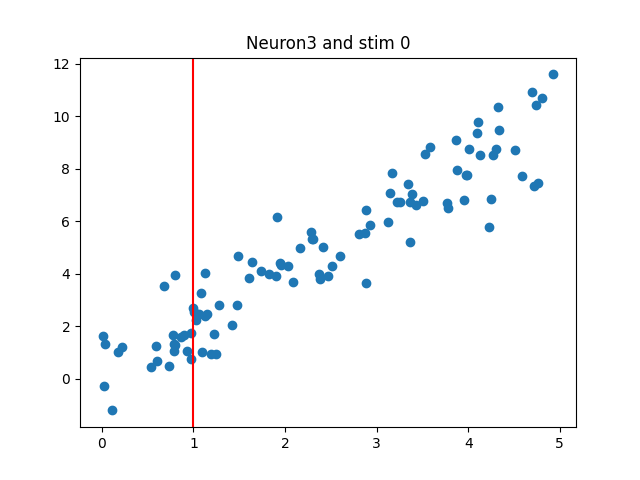

line
line
line
line
line
line
line
line
line
line
line
line
line
plot
line
line
line
line
line
line
line


In [57]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np 

# Create the plot
neuronplt_fig, neuronplt_ax = plt.subplots()
neuronplt_line = None

def plot_data(change,prep = None, stim = 0):
    global neuronplt_fig, neuronplt_ax, neuronplt_line
    if isinstance(change, int):
        neuron_id = change
    else:
        neuron_id = change.new
    neuronplt_ax.clear()
    neuronplt_line = neuronplt_ax.axvline(x=1, color='r')
    x = np.random.uniform(0,5,size = 100)
    ep = np.random.normal(size = 100)
    y = 2*x + ep
    neuronplt_ax.scatter(x,y)
    neuronplt_ax.set_title(f'Neuron{neuron_id} and stim {stim}')
    # print("plot")
    
def update_line(val):
    global neuronplt_line
    # Update the position of the vertical line based on the slider value
    neuronplt_line.set_xdata(val)
    # Redraw the plot
    neuronplt_fig.canvas.draw_idle()
    # print("line")


time_slider = widgets.FloatSlider(value=0, min=0, max=5, step=0.1, description='Time')
time_slider.layout.width = '6.53in'
time_slider.layout.margin = '0 -4px'

neuron_dropdown = widgets.Dropdown(
    options= range(0,10),
    value=3,
    description='Neuron ID:',
)

# Connect the slider's update event with the callback function
time_slider.observe(lambda change: update_line(change.new), names='value')
neuron_dropdown.observe(lambda change: plot_data(change.new), names='value')

# Display the plot and slider widget
# display(fig.canvas)
display(widgets.VBox([neuron_dropdown,time_slider]))
plot_data(neuron_dropdown.value)

## Incorporating Urchin:

In [ ]:
#Importing necessary libraries:
import oursin as urchin
import pandas as pd
urchin.setup()
# Define a quick convenience function for loading data
def get_data(url):
    data = url.replace("/edit#gid=", "/export?format=csv&gid=")
    df = pd.read_csv(data)
    return df
probe_data = get_data('https://docs.google.com/spreadsheets/d/1T-RG3d_MIBXZKmrGmLnsU-O7GmwY09Z0FY6yqbYyZXI/edit#gid=1457359713')
probe_data["theta"] = 90 - probe_data["theta"]
probe_data["phi"] = 270 - probe_data["phi"] 

In [ ]:
urchin.ccf25.load()

In [ ]:
urchin.ccf25.grey.set_visibility(True)
urchin.ccf25.grey.set_material('transparent-unlit')
urchin.ccf25.grey.set_color('#000000')
urchin.ccf25.grey.set_alpha(0.1)

In [ ]:
def probes_by_session(s = 1):
    session_probes = probe_data[probe_data["session"]==s]
    probes = urchin.probes.create(len(session_probes))
    urchin.probes.set_colors(probes,list(session_probes["color"].values))
    
    positions_list = []

    for i, row in session_probes.iterrows():
        position = [row['ap'], row['ml'], row['dv']]
        positions_list.append(position)

    urchin.probes.set_positions(probes, positions_list) #setting the positions within the renderer

    angles_list = []

    for i, row in session_probes.iterrows():
        angle = [row['phi'], row['theta'], 0] # roll is set to 0
        angles_list.append(angle)

    urchin.probes.set_angles(probes, angles_list) #setting the positions within the renderer

In [ ]:
widgets.interact(probes_by_session,s=(0.0,39,1.0))

### ignore code below:

In [ ]:
old_probes = []
    # if(len(old_probes)!= 0):
    #     urchin.probes.delete(old_probes)
    #old_probes =probes

In [ ]:
#old_probes = [] 
#if(len(old_probes)!= 0):
#        old_probes.delete()
slider = widgets.interact(probes_by_session,s=(0.0,39,1.0))
old_probes = slider.result

In [ ]:
from IPython.display import display
from ipywidgets import interactive

In [ ]:
w = interactive(probes_by_session, s=(0,39,1))

In [ ]:
display(w)